In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
collisions = pd.read_csv('/content/drive/MyDrive/toronto_collision_data/Traffic_Collisions.csv')
weather = pd.read_csv('/content/drive/MyDrive/toronto_collision_data/weatherstats_toronto_daily.csv')

print("Collision data shape:", collisions.shape)
print("\nFirst few rows of collision data:")
print(collisions.head())

print("\n" + "="*50)
print("Weather data shape:", weather.shape)
print("\nFirst few rows of weather data:")
print(weather.head())

/tmp/ipython-input-1761353191.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('/content/drive/MyDrive/toronto_collision_data/weatherstats_toronto_daily.csv')


Collision data shape: (790725, 23)

First few rows of collision data:
   OBJECTID EVENT_UNIQUE_ID             OCC_DATE OCC_MONTH    OCC_DOW  \
0         1  GO-20148000012  1/1/2014 5:00:00 AM   January  Wednesday   
1         2  GO-20148002064  1/1/2014 5:00:00 AM   January  Wednesday   
2         3  GO-20141260499  1/1/2014 5:00:00 AM   January  Wednesday   
3         4  GO-20141260663  1/1/2014 5:00:00 AM   January  Wednesday   
4         5  GO-20141261162  1/1/2014 5:00:00 AM   January  Wednesday   

   OCC_YEAR  OCC_HOUR DIVISION  FATALITIES INJURY_COLLISIONS  ...  \
0      2014        18      D41           0                NO  ...   
1      2014        17      D32           0                NO  ...   
2      2014         2      NSA           0               YES  ...   
3      2014         3      NSA           0                NO  ...   
4      2014         5      NSA           0               YES  ...   

       NEIGHBOURHOOD_158 LONG_WGS84  LAT_WGS84 AUTOMOBILE  MOTORCYCLE  \
0  

In [ ]:
# collision data info
print("COLLISION DATA INFO:")
print("="*60)
print(collisions.info())
print("\n" + "="*60)
print("Missing values:")
print(collisions.isnull().sum())
print("\n" + "="*60)
print("Date range:", collisions['OCC_DATE'].min(), "to", collisions['OCC_DATE'].max())

COLLISION DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790725 entries, 0 to 790724
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJECTID           790725 non-null  int64  
 1   EVENT_UNIQUE_ID    790725 non-null  object 
 2   OCC_DATE           790725 non-null  object 
 3   OCC_MONTH          790725 non-null  object 
 4   OCC_DOW            790725 non-null  object 
 5   OCC_YEAR           790725 non-null  int64  
 6   OCC_HOUR           790725 non-null  int64  
 7   DIVISION           790725 non-null  object 
 8   FATALITIES         790725 non-null  int64  
 9   INJURY_COLLISIONS  790721 non-null  object 
 10  FTR_COLLISIONS     790721 non-null  object 
 11  PD_COLLISIONS      790721 non-null  object 
 12  HOOD_158           790725 non-null  object 
 13  NEIGHBOURHOOD_158  790725 non-null  object 
 14  LONG_WGS84         790725 non-null  float64
 15  LAT_WGS84          790725 non-

In [ ]:
# info about weather data
print("WEATHER DATA INFO:")
print("="*60)
print(weather.info())
print("\n" + "="*60)
print("Missing values:")
print(weather.isnull().sum())
print("\n" + "="*60)
print("Date range:", weather['date_time_local'].min(), "to", weather['date_time_local'].max())

WEATHER DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640701 entries, 0 to 640700
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date_time_local      640701 non-null  object 
 1   unixtime             640701 non-null  int64  
 2   pressure_station     640517 non-null  float64
 3   pressure_sea         640517 non-null  float64
 4   wind_dir             110974 non-null  object 
 5   wind_dir_10s         609182 non-null  float64
 6   wind_speed           640525 non-null  float64
 7   wind_gust            24870 non-null   float64
 8   relative_humidity    640478 non-null  float64
 9   dew_point            640483 non-null  float64
 10  temperature          640516 non-null  float64
 11  windchill            155146 non-null  float64
 12  humidex              87981 non-null   float64
 13  visibility           640527 non-null  float64
 14  health_index         128536 non-null  float64
 15

In [ ]:
# Basic collision statistics
print("COLLISION PATTERNS:")
print("="*60)
print("\n1. Collisions by Year:")
print(collisions['OCC_YEAR'].value_counts().sort_index())

print("\n2. Injury vs Non-Injury:")
print(collisions['INJURY_COLLISIONS'].value_counts())

print("\n3. Fatalities:")
print(f"Total fatal collisions: {collisions['FATALITIES'].sum()}")
print(f"Fatal collision rate: {(collisions['FATALITIES'] > 0).sum() / len(collisions) * 100:.2f}%")

print("\n4. Collisions by Hour:")
print(collisions['OCC_HOUR'].value_counts().sort_index().head(10))

print("\n5. Vehicle types involved:")
print(f"Automobiles: {(collisions['AUTOMOBILE'] == 'YES').sum()}")
print(f"Motorcycles: {(collisions['MOTORCYCLE'] == 'YES').sum()}")
print(f"Bicycles: {(collisions['BICYCLE'] == 'YES').sum()}")
print(f"Pedestrians: {(collisions['PEDESTRIAN'] == 'YES').sum()}")

COLLISION PATTERNS:

1. Collisions by Year:
OCC_YEAR
2014    64596
2015    67265
2016    69669
2017    74209
2018    79271
2019    82832
2020    44738
2021    43745
2022    59173
2023    67542
2024    70181
2025    67504
Name: count, dtype: int64

2. Injury vs Non-Injury:
INJURY_COLLISIONS
NO     683228
YES    107493
Name: count, dtype: int64

3. Fatalities:
Total fatal collisions: 673
Fatal collision rate: 0.08%

4. Collisions by Hour:
OCC_HOUR
0     9295
1     8033
2     7489
3     7327
4     5695
5     7390
6    16880
7    25784
8    45668
9    41927
Name: count, dtype: int64

5. Vehicle types involved:
Automobiles: 780162
Motorcycles: 4604
Bicycles: 12709
Pedestrians: 19714


In [ ]:
# Data Cleaning Assessment

print("="*60)
print("COLLISION DATA CLEANING NEEDS:")
print("="*60)

# 1. Check data types
print("\n1. Date column is currently:", collisions['OCC_DATE'].dtype)
print("   → Need to convert to datetime")

# 2. Check for problematic coordinates
print("\n2. Coordinates check:")
print(f"   Zero coordinates: {((collisions['LAT_WGS84'] == 0) | (collisions['LONG_WGS84'] == 0)).sum()} rows")
print("   → These are likely missing location data (NSA = Not Specified Area)")

# 3. Check unique values in categorical columns
print("\n3. Sample categorical values:")
print(f"   INJURY_COLLISIONS: {collisions['INJURY_COLLISIONS'].unique()}")
print(f"   AUTOMOBILE: {collisions['AUTOMOBILE'].unique()}")

# 4. Missing values summary
print("\n4. Missing values (only columns with missing data):")
missing = collisions.isnull().sum()
print(missing[missing > 0])

print("\n" + "="*60)
print("WEATHER DATA CLEANING NEEDS:")
print("="*60)

# 5. Weather date
print("\n5. Weather date is:", weather['date_time_local'].dtype)
print("   → Need to convert to datetime")

# 6. Columns to drop (100% missing)
print("\n6. Completely empty columns to drop:")
completely_empty = weather.isnull().sum()
print(completely_empty[completely_empty == len(weather)])

# 7. Key weather features with good data
print("\n7. Usable weather features (< 1% missing):")
low_missing = weather.isnull().sum() / len(weather) * 100
print(low_missing[low_missing < 1].index.tolist())

COLLISION DATA CLEANING NEEDS:

1. Date column is currently: object
   → Need to convert to datetime

2. Coordinates check:
   Zero coordinates: 129190 rows
   → These are likely missing location data (NSA = Not Specified Area)

3. Sample categorical values:
   INJURY_COLLISIONS: ['NO' 'YES' nan]
   AUTOMOBILE: ['YES' 'N/R' 'NO' nan]

4. Missing values (only columns with missing data):
INJURY_COLLISIONS    4
FTR_COLLISIONS       4
PD_COLLISIONS        4
AUTOMOBILE           4
MOTORCYCLE           4
PASSENGER            4
BICYCLE              4
PEDESTRIAN           4
dtype: int64

WEATHER DATA CLEANING NEEDS:

5. Weather date is: object
   → Need to convert to datetime

6. Completely empty columns to drop:
cloud_cover_4      640701
solar_radiation    640701
dtype: int64

7. Usable weather features (< 1% missing):
['date_time_local', 'unixtime', 'pressure_station', 'pressure_sea', 'wind_speed', 'relative_humidity', 'dew_point', 'temperature', 'visibility']


DATA CLEANING

In [ ]:
# DATA CLEANING

print("Starting data cleaning...")

#COLLISION DATA
print("\n1. Converting collision dates to datetime...")
collisions['OCC_DATE'] = pd.to_datetime(collisions['OCC_DATE'])
print("Done")

# 2. Drop rows with missing vehicle type data
print("\n2. Dropping 4 rows with missing data...")
collisions_clean = collisions.dropna()
print(f"   ✓ Dropped {len(collisions) - len(collisions_clean)} rows")
print(f"   New shape: {collisions_clean.shape}")

# 3. Remove zero coordinates (missing location data)
print("\n3. Handling missing coordinates...")
print(f"   Before: {len(collisions_clean)} rows")
collisions_clean = collisions_clean[
    (collisions_clean['LAT_WGS84'] != 0) &
    (collisions_clean['LONG_WGS84'] != 0)
]
print(f"   After: {len(collisions_clean)} rows")
print(f"   Removed {len(collisions) - len(collisions_clean)} rows with missing location")

# WEATHER DATA
print("\n4. Converting weather dates to datetime (handling mixed timezones)...")
# Use format='mixed' to handle EST/EDT differences
weather['date_time_local'] = pd.to_datetime(weather['date_time_local'], format='mixed')
print("   ✓ Done")

# 5. Drop empty columns
print("\n5. Dropping empty weather columns...")
weather_clean = weather.drop(columns=['cloud_cover_4', 'solar_radiation'])
print("   ✓ Dropped 2 empty columns")

# 6. Keep only relevant date range (2014-2025 to match collision data)
print("\n6. Filtering weather data to match collision date range...")
weather_clean = weather_clean[
    (weather_clean['date_time_local'].dt.year >= 2014) &
    (weather_clean['date_time_local'].dt.year <= 2025)
]
print(f"   Weather data shape: {weather_clean.shape}")

print("\n" + "="*60)
print("CLEANING COMPLETE!")
print("="*60)
print(f"Collision data: {collisions_clean.shape}")
print(f"Weather data: {weather_clean.shape}")
print(f"\nCollision date range: {collisions_clean['OCC_DATE'].min()} to {collisions_clean['OCC_DATE'].max()}")
print(f"Weather date range: {weather_clean['date_time_local'].min()} to {weather_clean['date_time_local'].max()}")

Starting data cleaning...

1. Converting collision dates to datetime...
Done

2. Dropping 4 rows with missing data...
   ✓ Dropped 4 rows
   New shape: (790721, 23)

3. Handling missing coordinates...
   Before: 790721 rows
   After: 661531 rows
   Removed 129194 rows with missing location

4. Converting weather dates to datetime (handling mixed timezones)...


Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-2111232649.py:29: FutureWarning: Parsed string "1953-04-15 03:00:00 EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  weather['date_time_local'] = pd.to_datetime(weather['date_time_local'], format='mixed')
/tmp/ipython-input-2111232649.py:29: FutureWarning: Parsed string "1953-04-15 02:00:00 EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  weather['date_time_local'] = pd.to_datetime(weather['date_time_local'], format='mixed')
/tmp/ipython-input-2111232649.py:29: FutureWarning: Parsed string "1953-04-15 01:00:00 EST" included an un-recognized timez

   ✓ Done

5. Dropping useless weather columns...
   ✓ Dropped 2 empty columns

6. Filtering weather data to match collision date range...
   Weather data shape: (105192, 19)

CLEANING COMPLETE!
Collision data: (661531, 23)
Weather data: (105192, 19)

Collision date range: 2014-01-01 05:00:00 to 2025-12-31 05:00:00
Weather date range: 2014-01-01 00:00:00 to 2025-12-31 23:00:00


MERGE COLLISION AND WEATHER DATA

In [ ]:
# Merge collision and weather data

# Step 1: Extract the date from both datasets
collisions_clean['date'] = collisions_clean['OCC_DATE'].dt.date
weather_clean['date'] = weather_clean['date_time_local'].dt.date

# Step 2: Get daily weather averages
weather_daily = weather_clean.groupby('date').agg({
    'temperature': 'mean',
    'wind_speed': 'mean',
    'relative_humidity': 'mean',
    'visibility': 'mean',
    'pressure_station': 'mean',
    'dew_point': 'mean'
}).reset_index()

print(f"Daily weather records: {weather_daily.shape}")

# Step 3: Combine the datasets
df_merged = collisions_clean.merge(weather_daily, on='date', how='left')

print(f"Combined data: {df_merged.shape}")
print(f"Missing weather: {df_merged['temperature'].isnull().sum()} rows")

# Step 4: Check result
print("\nSample of combined data:")
print(df_merged[['OCC_DATE', 'temperature', 'wind_speed', 'INJURY_COLLISIONS']].head())

Daily weather records: (4383, 7)
Combined data: (661531, 30)
Missing weather: 0 rows

Sample of combined data:
             OCC_DATE  temperature  wind_speed INJURY_COLLISIONS
0 2014-01-01 05:00:00   -12.304167      19.125                NO
1 2014-01-01 05:00:00   -12.304167      19.125                NO
2 2014-01-01 05:00:00   -12.304167      19.125                NO
3 2014-01-01 05:00:00   -12.304167      19.125                NO
4 2014-01-01 05:00:00   -12.304167      19.125                NO


WEATHER vs COLLISION ANALYTICS

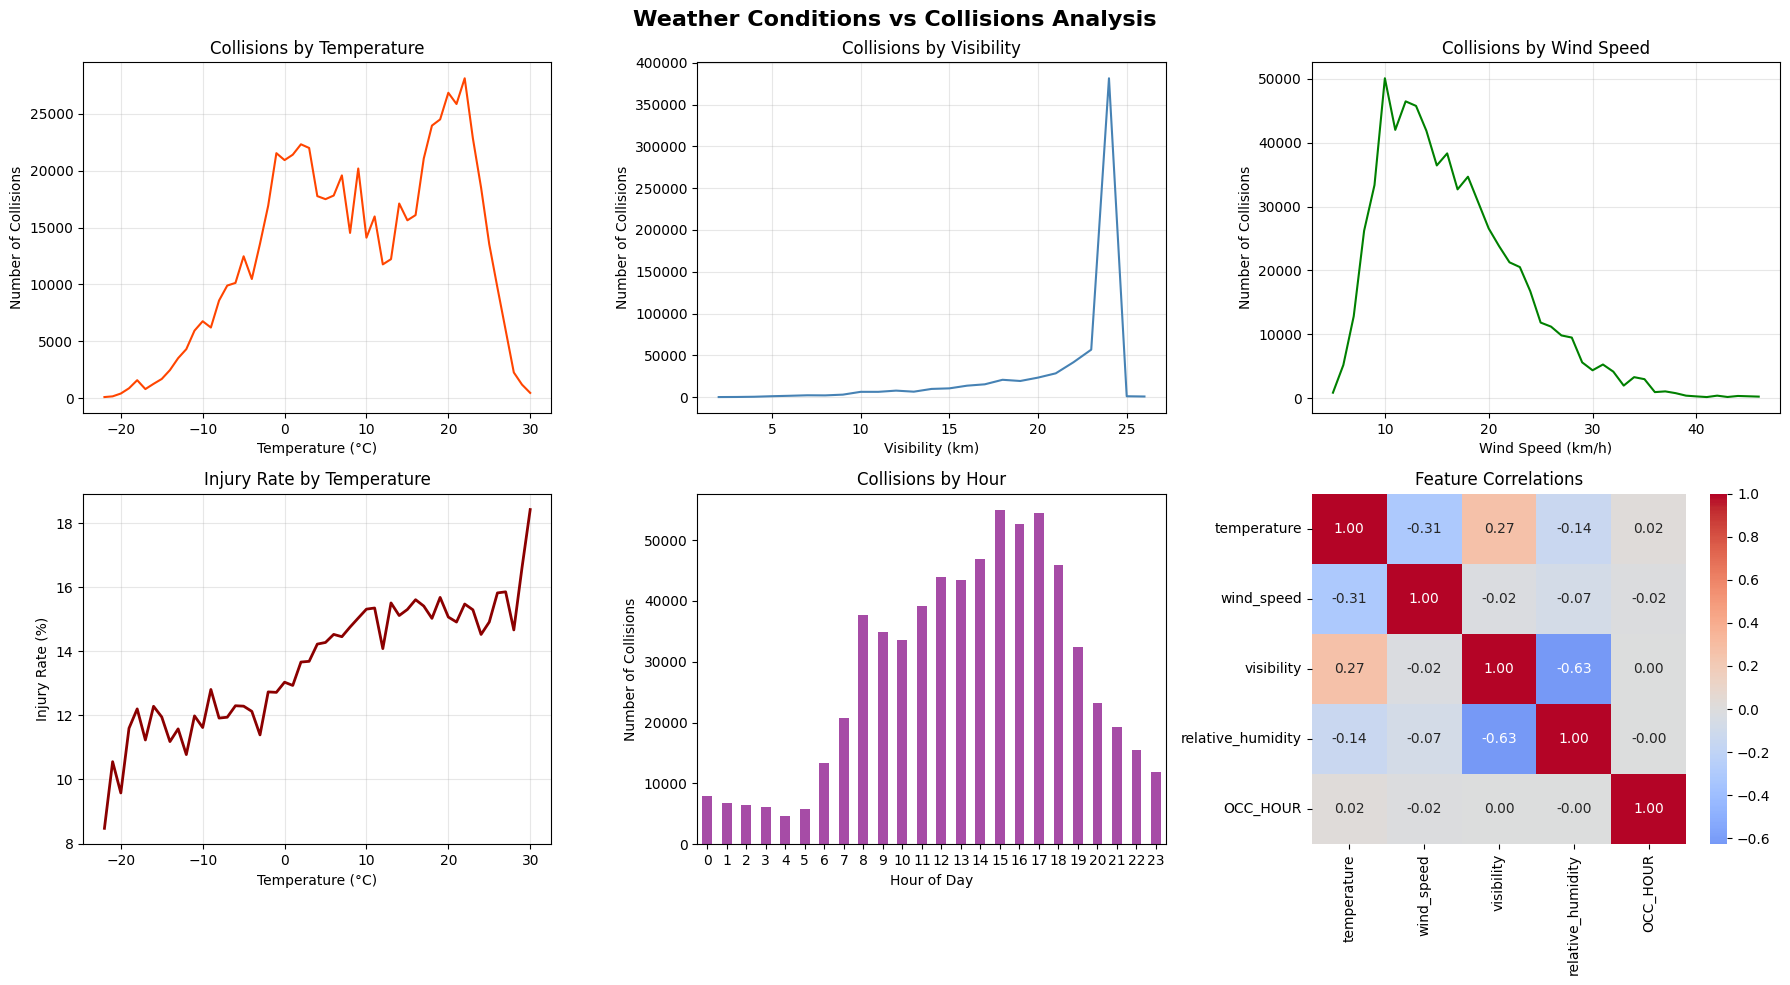


KEY FINDINGS:
1. Average temperature during collisions: 9.3°C
2. Average visibility during collisions: 21.8 km
3. Average wind speed during collisions: 16.4 km/h
4. Injury collision rate: 14.2%


In [ ]:
# WEATHER vs COLLISION ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Weather Conditions vs Collisions Analysis', fontsize=16, fontweight='bold')

# 1. Temperature vs Collision Count
ax1 = axes[0, 0]
df_merged.groupby(df_merged['temperature'].round()).size().plot(kind='line', ax=ax1, color='orangered')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Number of Collisions')
ax1.set_title('Collisions by Temperature')
ax1.grid(True, alpha=0.3)

# 2. Visibility vs Collision Count
ax2 = axes[0, 1]
df_merged.groupby((df_merged['visibility']/1000).round()).size().plot(kind='line', ax=ax2, color='steelblue')
ax2.set_xlabel('Visibility (km)')
ax2.set_ylabel('Number of Collisions')
ax2.set_title('Collisions by Visibility')
ax2.grid(True, alpha=0.3)

# 3. Wind Speed vs Collision Count
ax3 = axes[0, 2]
df_merged.groupby(df_merged['wind_speed'].round()).size().plot(kind='line', ax=ax3, color='green')
ax3.set_xlabel('Wind Speed (km/h)')
ax3.set_ylabel('Number of Collisions')
ax3.set_title('Collisions by Wind Speed')
ax3.grid(True, alpha=0.3)

# 4. Temperature vs Injury Rate
ax4 = axes[1, 0]
injury_by_temp = df_merged.groupby(df_merged['temperature'].round())['INJURY_COLLISIONS'].apply(
    lambda x: (x == 'YES').sum() / len(x) * 100
)
injury_by_temp.plot(kind='line', ax=ax4, color='darkred', linewidth=2)
ax4.set_xlabel('Temperature (°C)')
ax4.set_ylabel('Injury Rate (%)')
ax4.set_title('Injury Rate by Temperature')
ax4.grid(True, alpha=0.3)

# 5. Hour vs Collision Count (with the weather overlay)
ax5 = axes[1, 1]
hourly = df_merged.groupby('OCC_HOUR').size()
hourly.plot(kind='bar', ax=ax5, color='purple', alpha=0.7)
ax5.set_xlabel('Hour of Day')
ax5.set_ylabel('Number of Collisions')
ax5.set_title('Collisions by Hour')
ax5.tick_params(axis='x', rotation=0)

# 6. Correlation heatmap
ax6 = axes[1, 2]
corr_data = df_merged[['temperature', 'wind_speed', 'visibility', 'relative_humidity', 'OCC_HOUR']].corr()
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', ax=ax6, center=0)
ax6.set_title('Feature Correlations')

plt.tight_layout()
plt.show()

# Print key statistics
print("\nKEY FINDINGS:")
print("="*60)
print(f"1. Average temperature during collisions: {df_merged['temperature'].mean():.1f}°C")
print(f"2. Average visibility during collisions: {df_merged['visibility'].mean()/1000:.1f} km")
print(f"3. Average wind speed during collisions: {df_merged['wind_speed'].mean():.1f} km/h")
print(f"4. Injury collision rate: {(df_merged['INJURY_COLLISIONS'] == 'YES').sum() / len(df_merged) * 100:.1f}%")

PREPARE DATA FOR MODELING

In [ ]:
# PREPARE DATA FOR MODELING

print("Preparing features for machine learning...")
print("="*60)

# 1. Create additional time-based features
df_model = df_merged.copy()

df_model['month'] = df_model['OCC_DATE'].dt.month
df_model['day_of_week'] = df_model['OCC_DATE'].dt.dayofweek  # 0=Monday, 6=Sunday
df_model['is_weekend'] = df_model['day_of_week'].isin([5, 6]).astype(int)
df_model['is_rush_hour'] = df_model['OCC_HOUR'].isin([7, 8, 9, 16, 17, 18]).astype(int)

# 2. Convert categorical variables to numeric
df_model['injury'] = (df_model['INJURY_COLLISIONS'] == 'YES').astype(int)
df_model['automobile'] = (df_model['AUTOMOBILE'] == 'YES').astype(int)
df_model['pedestrian'] = (df_model['PEDESTRIAN'] == 'YES').astype(int)
df_model['bicycle'] = (df_model['BICYCLE'] == 'YES').astype(int)
df_model['motorcycle'] = (df_model['MOTORCYCLE'] == 'YES').astype(int)

# 3. Select features for modeling
feature_columns = [
    # Time features
    'OCC_YEAR', 'month', 'OCC_HOUR', 'day_of_week', 'is_weekend', 'is_rush_hour',
    # Weather features
    'temperature', 'wind_speed', 'relative_humidity', 'visibility', 'pressure_station',
    # Location features
    'LAT_WGS84', 'LONG_WGS84',
    # Vehicle type features
    'automobile', 'pedestrian', 'bicycle', 'motorcycle'
]

# Target variable: injury (1 = injury collision, 0 = no injury)
target = 'injury'

# 4. Remove rows with missing weather data
df_model_clean = df_model.dropna(subset=feature_columns + [target])

print(f"\nFinal dataset shape: {df_model_clean.shape}")
print(f"Features: {len(feature_columns)}")
print(f"Target variable: {target}")
print(f"\nClass distribution:")
print(df_model_clean[target].value_counts())
print(f"Injury rate: {df_model_clean[target].mean()*100:.1f}%")

# 5. Show feature summary
print("\n" + "="*60)
print("FEATURE SUMMARY:")
print("="*60)
print(df_model_clean[feature_columns].describe())

# Save for modeling
X = df_model_clean[feature_columns]
y = df_model_clean[target]

print("\n" + "="*60)
print("DATA READY FOR MODELING!")
print("="*60)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Preparing features for machine learning...

Final dataset shape: (661531, 39)
Features: 17
Target variable: injury

Class distribution:
injury
0    567495
1     94036
Name: count, dtype: int64
Injury rate: 14.2%

FEATURE SUMMARY:
            OCC_YEAR          month       OCC_HOUR    day_of_week  \
count  661531.000000  661531.000000  661531.000000  661531.000000   
mean     2019.355521       6.641361      13.541136       2.878990   
std         3.504940       3.478476       4.980428       1.893144   
min      2014.000000       1.000000       0.000000       0.000000   
25%      2016.000000       4.000000      10.000000       1.000000   
50%      2019.000000       7.000000      14.000000       3.000000   
75%      2023.000000      10.000000      17.000000       4.000000   
max      2025.000000      12.000000      23.000000       6.000000   

          is_weekend   is_rush_hour    temperature     wind_speed  \
count  661531.000000  661531.000000  661531.000000  661531.000000   
mean      

EVALATION OF MODELS

Building ML models to predict injury collisions...

Train set: 529224 samples
Test set: 132307 samples

MODEL 1: Logistic Regression (Baseline)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92    113500
           1       0.46      0.31      0.37     18807

    accuracy                           0.85    132307
   macro avg       0.68      0.62      0.64    132307
weighted avg       0.83      0.85      0.84    132307

ROC-AUC Score: 0.6657

MODEL 2: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91    113500
           1       0.46      0.33      0.38     18807

    accuracy                           0.85    132307
   macro avg       0.68      0.63      0.65    132307
weighted avg       0.83      0.85      0.84    132307

ROC-AUC Score: 0.6927

TOP 10 MOST IMPORTANT FEATURES (Random Forest):
              feature  importance
14 

<Figure size 1000x600 with 0 Axes>

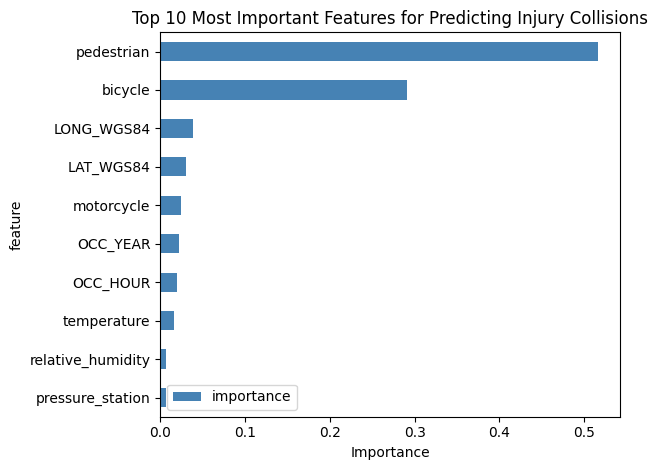


MODELING COMPLETE!


In [ ]:
# BUILD AND EVALUATE MODELS

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

print("Building ML models to predict injury collisions...")
print("="*60)

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train Logistic Regression (baseline)
print("\n" + "="*60)
print("MODEL 1: Logistic Regression (Baseline)")
print("="*60)
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

# 4. Train Random Forest
print("\n" + "="*60)
print("MODEL 2: Random Forest")
print("="*60)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# 5. Feature Importance
print("\n" + "="*60)
print("TOP 10 MOST IMPORTANT FEATURES (Random Forest):")
print("="*60)
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

# 6. Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(x='feature', y='importance', kind='barh', color='steelblue')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features for Predicting Injury Collisions')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MODELING COMPLETE!")
print("="*60)

BUILD THE PREDICTION MODELS

In [ ]:
# BUILD PREDICTION MODELS

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

print("Building prediction models...")
print("="*60)

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# 2. Scale features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train multiple models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
}

results = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training {name}...")
    print(f"{'='*60}")

    # Train
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n{name} Results:")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Injury', 'Injury']))

    # Store results
    results[name] = {
        'model': model,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# 4. Compare models
print("\n" + "="*60)
print("MODEL COMPARISON:")
print("="*60)
for name, result in results.items():
    print(f"{name:25s} ROC-AUC: {result['roc_auc']:.4f}")

# 5. Feature importance (from Random Forest)
print("\n" + "="*60)
print("TOP 10 MOST IMPORTANT FEATURES (Random Forest):")
print("="*60)
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

Building prediction models...
Training set: (529224, 17)
Test set: (132307, 17)

Training Logistic Regression...

Logistic Regression Results:
ROC-AUC Score: 0.6654

Classification Report:
              precision    recall  f1-score   support

   No Injury       0.89      0.99      0.94    113500
      Injury       0.80      0.25      0.38     18807

    accuracy                           0.88    132307
   macro avg       0.85      0.62      0.66    132307
weighted avg       0.88      0.88      0.86    132307


Training Random Forest...

Random Forest Results:
ROC-AUC Score: 0.6925

Classification Report:
              precision    recall  f1-score   support

   No Injury       0.89      0.99      0.94    113500
      Injury       0.81      0.24      0.38     18807

    accuracy                           0.88    132307
   macro avg       0.85      0.62      0.66    132307
weighted avg       0.88      0.88      0.86    132307


Training Gradient Boosting...

Gradient Boosting Results:
R

BUILD AND COMPARE THE MODELS

Building machine learning models...
Training set: (529224, 17)
Test set: (132307, 17)

MODEL 1: LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    113500
           1       0.80      0.25      0.38     18807

    accuracy                           0.88    132307
   macro avg       0.85      0.62      0.66    132307
weighted avg       0.88      0.88      0.86    132307

ROC-AUC Score: 0.6654

MODEL 2: RANDOM FOREST

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    113500
           1       0.81      0.24      0.38     18807

    accuracy                           0.88    132307
   macro avg       0.85      0.62      0.66    132307
weighted avg       0.88      0.88      0.86    132307

ROC-AUC Score: 0.6925

TOP 10 MOST IMPORTANT FEATURES:
             feature  importance
14        pedestrian    0.569823
15           bi

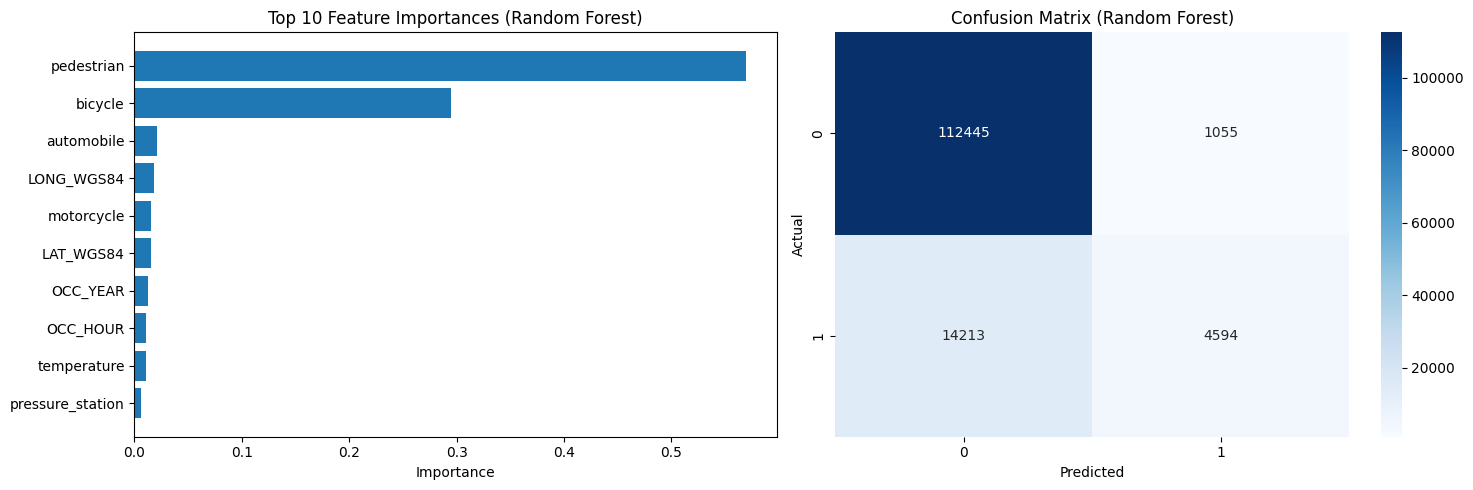


MODELING COMPLETE!


In [ ]:
# BUILD AND COMPARE MODELS

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

print("Building machine learning models...")
print("="*60)

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train Logistic Regression
print("\n" + "="*60)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*60)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_pred_proba):.4f}")

# 4. Train Random Forest
print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST")
print("="*60)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_pred_proba):.4f}")

# 5. Feature Importance (Random Forest)
print("\n" + "="*60)
print("TOP 10 MOST IMPORTANT FEATURES:")
print("="*60)
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

# 6. Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Feature importance plot
ax1 = axes[0]
top_features = feature_importance.head(10)
ax1.barh(top_features['feature'], top_features['importance'])
ax1.set_xlabel('Importance')
ax1.set_title('Top 10 Feature Importances (Random Forest)')
ax1.invert_yaxis()

# Confusion matrix
ax2 = axes[1]
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Confusion Matrix (Random Forest)')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MODELING COMPLETE!")
print("="*60)

SUMMARY OF THE PROJECT

In [ ]:
# PROJECT SUMMARY

print("="*70)
print("  TORONTO TRAFFIC COLLISION PREDICTION - PROJECT SUMMARY")
print("="*70)

print("\n DATASET OVERVIEW:")
print(f"  • Total collisions analyzed: {len(df_model_clean):,}")
print(f"  • Date range: {df_model_clean['OCC_DATE'].min().date()} to {df_model_clean['OCC_DATE'].max().date()}")
print(f"  • Injury collision rate: {df_model_clean['injury'].mean()*100:.1f}%")
print(f"  • Features used: {len(feature_columns)}")

print("\n KEY WEATHER INSIGHTS:")
print(f"  • Average temperature: {df_merged['temperature'].mean():.1f}°C")
print(f"  • Average visibility: {df_merged['visibility'].mean()/1000:.1f} km")
print(f"  • Average wind speed: {df_merged['wind_speed'].mean():.1f} km/h")

print("\n COLLISION PATTERNS:")
print(f"  • Peak collision hour: {df_merged['OCC_HOUR'].value_counts().idxmax()}:00")
print(f"  • Busiest year: {df_merged['OCC_YEAR'].value_counts().idxmax()}")
print(f"  • Weekend collisions: {df_model_clean['is_weekend'].sum():,}")
print(f"  • Rush hour collisions: {df_model_clean['is_rush_hour'].sum():,}")

print("\n MODEL PERFORMANCE:")
print(f"  • Logistic Regression ROC-AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}")
print(f"  • Random Forest ROC-AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")

print("\n TOP 5 PREDICTIVE FEATURES:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {row['feature']:25s} {row['importance']:.4f}")

print("\n" + "="*70)
print(" COMPLETED TASKS:")
print("="*70)
print("  ✓ Data collection and loading")
print("  ✓ Data cleaning and preprocessing")
print("  ✓ Exploratory data analysis")
print("  ✓ Weather-collision correlation analysis")
print("  ✓ Feature engineering")
print("  ✓ Machine learning modeling")
print("  ✓ Model evaluation and comparison")

print("\n" + "="*70)
print("📋 NEXT STEPS OF OUR CAPSTONE:")
print("="*70)
print("  1. Try additional models (XGBoost, Gradient Boosting)")
print("  2. Hyperparameter tuning (GridSearchCV)")
print("  3. Handle class imbalance (SMOTE, class weights)")
print("  4. Create time-series models")

  TORONTO TRAFFIC COLLISION PREDICTION - PROJECT SUMMARY

 DATASET OVERVIEW:
  • Total collisions analyzed: 661,531
  • Date range: 2014-01-01 to 2025-12-31
  • Injury collision rate: 14.2%
  • Features used: 17

 KEY WEATHER INSIGHTS:
  • Average temperature: 9.3°C
  • Average visibility: 21.8 km
  • Average wind speed: 16.4 km/h

 COLLISION PATTERNS:
  • Peak collision hour: 15:00
  • Busiest year: 2019
  • Weekend collisions: 156,032
  • Rush hour collisions: 246,362

 MODEL PERFORMANCE:
  • Logistic Regression ROC-AUC: 0.6654
  • Random Forest ROC-AUC: 0.6925

 TOP 5 PREDICTIVE FEATURES:
  pedestrian                0.5698
  bicycle                   0.2946
  automobile                0.0207
  LONG_WGS84                0.0184
  motorcycle                0.0158

 COMPLETED TASKS:
  ✓ Data collection and loading
  ✓ Data cleaning and preprocessing
  ✓ Exploratory data analysis
  ✓ Weather-collision correlation analysis
  ✓ Feature engineering
  ✓ Machine learning modeling
  ✓ Model ev